In [2]:
import os
import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [7]:
def test_data(file):
    try:
        file['datetime']
        return True
    except KeyError:
        return False
    
def load_csv(datapath):
    file = pd.read_csv(os.path.join(datapath), delimiter=';')
    # check correct delimiter usage (not uniform)
    if not test_data(file):
        file = pd.read_csv(os.path.join(datapath), delimiter=',')
    return file

def initialise_empty_df(filepath, dropset=False):
    if not dropset:
        file = pd.read_csv(filepath, delimiter=';')
        if not test_data(file):
            file = pd.read_csv(filepath, delimiter=',')
        return pd.DataFrame(columns=file.columns)

def load_data(datapath):
    data = initialise_empty_df(os.path.join(datapath, os.listdir(datapath)[0]))
    for idx, filename in enumerate(os.listdir(datapath)):
        stationid = filename.split('.csv')[0]
        file = load_csv(os.path.join(datapath, filename))
        file['stationid'] = [stationid] * file.shape[0]
        data = pd.concat((data, file))
    return data

## Analysis of Training datasets 
Set paths and time window information

In [24]:
datapath = 'S:/pools/t/T-IDP-Projekte-u-Vorlesungen/Meteoblue/QRF/Data/QRF Training/Datasets/run3'
start = pd.to_datetime('2019-08-24 18:00')
end = pd.to_datetime('2019-08-26 02:00')


Load training data and limit to trained time window

In [ ]:
datafile = os.path.join(os.path.dirname(datapath), f'data_{os.path.basename(datapath)}.json')
if os.path.exists(datafile):
    data = joblib.load(datafile)
    joblib.dump(data, datafile)
else:
    data = load_data(datapath)

In [22]:
def idxs_in_window(starttime, endtime, timecolumn):
    afterStart = (timecolumn >= starttime).to_list()
    beforeEnd = (timecolumn <= endtime).to_list()
    inWindow = [a and b for a, b in zip(afterStart, beforeEnd)]
    return inWindow

def data_in_window(starttime, endtime, file):
    # time formatting
    inWindow = [False for x in range(len(file))]
    inWindow_idxs = idxs_in_window(starttime, endtime, file['datetime'])
    inWindow = [a or b for a, b in zip(inWindow, inWindow_idxs)]

    data = file.iloc[inWindow]
    return data

In [25]:
training_data = data_in_window(start, end, data)

In [26]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.head()


,datetime,time,altitude,buildings,buildings_10,buildings_30,buildings_100,buildings_200,buildings_500,forests,...,urbangreen_10,urbangreen_30,urbangreen_100,urbangreen_200,urbangreen_500,humidity,irradiation,moving_average,temperature,stationid
0,2019-06-03 12:50:00,12:50:00,398.765228,0.0,0.197985,0.028512,0.002686,0.000678,0.000109,0.0,...,0.0,0.000006,5.798367e-07,1.464051e-07,2.356530e-08,48.17,857.198706,23.650000,23.65,C0B425A3EF9E
1,2019-06-03 13:00:00,13:00:00,398.765228,0.0,0.197985,0.028512,0.002686,0.000678,0.000109,0.0,...,0.0,0.000006,5.798367e-07,1.464051e-07,2.356530e-08,48.01,860.628565,24.045000,24.44,C0B425A3EF9E
2,2019-06-03 13:10:00,13:10:00,398.765228,0.0,0.197985,0.028512,0.002686,0.000678,0.000109,0.0,...,0.0,0.000006,5.798367e-07,1.464051e-07,2.356530e-08,48.76,863.702786,24.166667,24.41,C0B425A3EF9E
3,2019-06-03 13:20:00,13:20:00,398.765228,0.0,0.197985,0.028512,0.002686,0.000678,0.000109,0.0,...,0.0,0.000006,5.798367e-07,1.464051e-07,2.356530e-08,53.84,866.439643,24.057500,23.73,C0B425A3EF9E
4,2019-06-03 13:30:00,13:30:00,398.765228,0.0,0.197985,0.028512,0.002686,0.000678,0.000109,0.0,...,0.0,0.000006,5.798367e-07,1.464051e-07,2.356530e-08,85.94,868.855036,27.766000,42.60,C0B425A3EF9E


Scatterplot of all temperatures by time

Text(0.5, 0, 'Datetime')

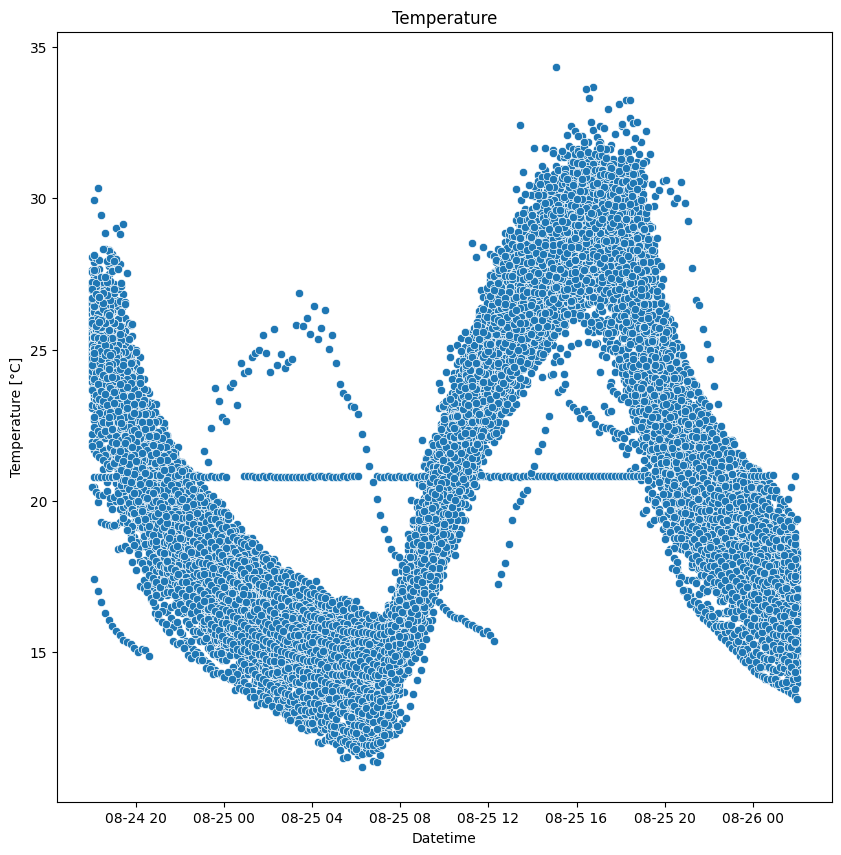

In [28]:
ax, fig = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.scatterplot(data=training_data, x='datetime', y='temperature')
ax.set_title('Temperature')
ax.set_ylabel('Temperature [°C]')
ax.set_xlabel('Datetime')